In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,NaN,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,NaN,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,NaN,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,NaN,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,NaN,20,2.8,3.7,1.5,0.2,10.9


In [2]:
df = df.drop(['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS'], axis=1)

In [3]:
df1 = pd.read_csv('2019DraftClass.csv')
df1.head()


,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [4]:
df2 = df.append(df1, ignore_index = True)
df2.tail()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,...,ORB,PF,PTS,Pos,SOS,STL,School,TOV,TRB,Year
972,3.6,0.509,7.1,1.9,0.343,5.5,1.7,NaN,0.5,3.6,...,1.2,2.3,15.5,NaN,6.82,0.7,UCLA,1.6,4.8,NaN
973,2.6,0.633,4.1,0.0,0.167,0.2,0.4,NaN,0.6,2.8,...,2.6,1.9,7.0,NaN,9.15,0.3,LSU,1.1,5.4,NaN
974,5.0,0.540,9.2,0.3,0.291,1.0,2.1,NaN,1.5,4.0,...,2.5,3.2,15.7,NaN,10.15,0.9,Tennessee,2.1,6.5,NaN
975,8.2,0.747,11.0,0.7,0.338,2.2,2.1,NaN,1.8,5.4,...,3.5,2.1,22.6,NaN,11.97,2.1,Duke,2.4,8.9,NaN
976,2.6,0.639,4.1,0.0,0.000,0.0,0.5,NaN,2.4,3.3,...,1.4,2.6,6.4,NaN,5.49,0.5,Oregon,1.1,4.7,NaN


In [5]:
df2 = df2.set_index('Name')
df2 = df2.drop(['School'], axis=1)
df2.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,...,MP,ORB,PF,PTS,Pos,SOS,STL,TOV,TRB,Year
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,0.9,0.510,1.7,0.2,0.324,0.6,0.2,22.0,0.2,0.9,...,9.0,0.6,1.0,3.2,NaN,-5.93,0.2,0.7,1.5,1990.0
Ashraf Amaya,5.2,0.581,9.0,0.1,0.229,0.4,0.6,24.0,1.2,3.4,...,32.2,2.9,3.3,14.6,NaN,0.74,1.1,1.9,8.9,1996.0
James Cotton,0.8,0.469,1.7,0.0,0.000,0.1,0.4,22.0,0.3,2.0,...,13.9,0.7,2.4,2.9,NaN,-7.38,0.6,0.9,2.7,1998.0
Eddie Robinson,1.5,0.403,3.8,0.3,0.234,1.1,3.4,23.0,0.2,3.6,...,32.6,0.3,1.4,5.2,NaN,-7.20,0.8,2.9,3.1,2000.0
Gilbert Arenas,4.1,0.523,7.9,1.5,0.361,4.2,2.2,20.0,0.2,2.8,...,30.5,0.8,2.4,15.8,NaN,11.13,1.9,2.7,3.8,2002.0


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [8]:
# Correlation Matrix

AxesSubplot(0.125,0.137143;0.62x0.730714)


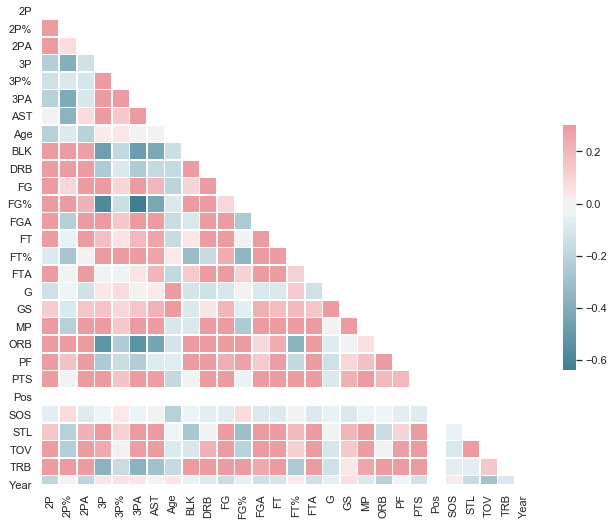

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))


In [10]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [11]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [19]:
df2.columns

Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 'Age', 'BLK', 'DRB',
       'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'G', 'GS', 'MP', 'ORB', 'PF',
       'PTS', 'Pos', 'SOS', 'STL', 'TOV', 'TRB', 'Year'],
      dtype='object')

In [20]:
# Data Clustering

In [21]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()